In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
import datetime


In [2]:
# Lectura del dataset
df = pd.read_csv(r'C:\Users\mape1\Desktop\Master Big Data y Data Analysis\TFM\202403-citibike-tripdata.csv', low_memory=False)

In [3]:
# Descripción del dataset

df.head()
#df.info()
#df.isnull().sum()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,62021B31AF42943E,electric_bike,2024-03-13 15:57:41.800,2024-03-13 16:07:09.853,Forsyth St & Grand St,5382.07,Front St & Jay St,4895.03,40.717763,-73.993166,40.702461,-73.986842,member
1,EC7BE9D296FFD072,electric_bike,2024-03-16 10:25:46.114,2024-03-16 10:30:21.554,E 12 St & 3 Ave,5788.12,Mott St & Prince St,5561.04,40.732456,-73.988554,40.723180,-73.994800,member
2,EC85C0EEC95157BB,classic_bike,2024-03-20 19:20:49.818,2024-03-20 19:28:00.165,E 12 St & 3 Ave,5788.12,Mott St & Prince St,5561.04,40.732233,-73.988900,40.723180,-73.994800,member
3,9DDE9AF5606B4E0F,classic_bike,2024-03-13 20:31:12.599,2024-03-13 20:40:31.209,6 Ave & W 34 St,6364.10,E 25 St & 1 Ave,6004.07,40.749640,-73.988050,40.738177,-73.977387,member
4,E4446F457328C5FE,electric_bike,2024-03-16 10:50:11.535,2024-03-16 10:53:02.451,Cleveland Pl & Spring St,5492.05,Mott St & Prince St,5561.04,40.721995,-73.997344,40.723180,-73.994800,member


In [4]:
# Eliminamos valores vacíos, después volvemos a comprobar nulos

df.dropna(subset=['start_station_id', 'end_station_id'], inplace=True)
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [5]:
# Cambiamos tipo a datetime en las columnas especificadas
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [6]:
# Crear un grafo dirigido donde los nodos son las estaciones y las aristas representan los viajes entre ellas.
G = nx.DiGraph()

In [7]:
# Las latitudes y longitudes de cada id de estación no son únicas, por tanto tenemos que truncarlas a dos decimales,
# para evitar que en el siguiente paso haya valores duplicados.
df['start_lat'] = df['start_lat'].round(2)
df['start_lng'] = df['start_lng'].round(2)
df['end_lat'] = df['end_lat'].round(2)
df['end_lng'] = df['end_lng'].round(2)

In [8]:
# Obtener estaciones de inicio
start_stations = df[['start_station_id', 'start_lat', 'start_lng']].drop_duplicates(subset='start_station_id')
start_stations.rename(columns={'start_station_id': 'station_id', 'start_lat': 'lat', 'start_lng': 'lng'}, inplace=True)

# Obtener estaciones de destino
end_stations = df[['end_station_id', 'end_lat', 'end_lng']].drop_duplicates(subset='end_station_id')
end_stations.rename(columns={'end_station_id': 'station_id', 'end_lat': 'lat', 'end_lng': 'lng'}, inplace=True)

# Combinar estaciones de inicio y destino
stations = pd.concat([start_stations, end_stations], ignore_index=True).drop_duplicates(subset='station_id')


In [20]:
stations.head()

,lat,lng
station_id,,
5382.07,40.72,-73.99
5788.12,40.73,-73.99
6364.10,40.75,-73.99
5492.05,40.72,-74.00
6215.07,40.75,-73.99


In [21]:
# Establecer el índice y convertir a diccionario
#stations.set_index('station_id', inplace=True)
station_attrs = stations.to_dict(orient='index')

print(station_attrs)

# Asignar atributos a los nodos del grafo
nx.set_node_attributes(G, station_attrs)

{'5382.07': {'lat': 40.72, 'lng': -73.99}, '5788.12': {'lat': 40.73, 'lng': -73.99}, '6364.10': {'lat': 40.75, 'lng': -73.99}, '5492.05': {'lat': 40.72, 'lng': -74.0}, '6215.07': {'lat': 40.75, 'lng': -73.99}, '7652.04': {'lat': 40.8, 'lng': -73.94}, '6107.08': {'lat': 40.74, 'lng': -74.0}, '3344.02': {'lat': 40.65, 'lng': -73.97}, '3202.06': {'lat': 40.65, 'lng': -74.01}, '6825.03': {'lat': 40.76, 'lng': -73.89}, '7074.01': {'lat': 40.77, 'lng': -73.91}, '5308.04': {'lat': 40.72, 'lng': -73.96}, '5010.02': {'lat': 40.71, 'lng': -73.92}, '5914.03': {'lat': 40.74, 'lng': -74.0}, '8096.02': {'lat': 40.83, 'lng': -73.93}, '7704.04': {'lat': 40.81, 'lng': -73.95}, '6814.01': {'lat': 40.76, 'lng': -73.95}, '5288.12': {'lat': 40.71, 'lng': -74.01}, '7992.04': {'lat': 40.83, 'lng': -73.94}, '7116.04': {'lat': 40.77, 'lng': -73.98}, '4107.05': {'lat': 40.68, 'lng': -73.96}, '7188.13': {'lat': 40.78, 'lng': -73.96}, '4494.04': {'lat': 40.69, 'lng': -73.96}, '4138.04': {'lat': 40.68, 'lng': -73.

In [10]:
# Agregamos aristas con pesos basados en el número de viajes entre estaciones
edge_weights = df.groupby(['start_station_id', 'end_station_id']).size().reset_index(name='weight')
for idx, row in edge_weights.iterrows():
    G.add_edge(row['start_station_id'], row['end_station_id'], weight=row['weight'])

In [16]:
stations['lat'] = pd.to_numeric(stations['lat'], errors='coerce')
stations['lng'] = pd.to_numeric(stations['lng'], errors='coerce')

In [11]:
#!pip install python-louvain

In [22]:
G_undirected = G.to_undirected()
for node, data in G_undirected.nodes(data=True):
    print(f"Nodo {node}: {data}")

Nodo 2733.03: {'lat': 40.63, 'lng': -74.02}
Nodo 2782.02: {'lat': 40.64, 'lng': -74.02}
Nodo 2821.05: {'lat': 40.64, 'lng': -74.01}
Nodo 2832.03: {'lat': 40.64, 'lng': -74.02}
Nodo 2872.02: {'lat': 40.64, 'lng': -74.02}
Nodo 2883.03: {'lat': 40.64, 'lng': -74.02}
Nodo 2932.03: {'lat': 40.64, 'lng': -74.03}
Nodo 2961.05: {'lat': 40.64, 'lng': -74.02}
Nodo 3000.08: {'lat': 40.64, 'lng': -74.01}
Nodo 3011.03: {'lat': 40.64, 'lng': -74.02}
Nodo 3019.02: {'lat': 40.64, 'lng': -74.03}
Nodo 3038.08: {'lat': 40.64, 'lng': -74.01}
Nodo 3050.03: {'lat': 40.64, 'lng': -74.01}
Nodo 3056.05: {'lat': 40.64, 'lng': -73.99}
Nodo 3129.08: {'lat': 40.64, 'lng': -74.01}
Nodo 3169.07: {'lat': 40.64, 'lng': -74.01}
Nodo 3178.02: {'lat': 40.65, 'lng': -74.02}
Nodo 3202.06: {'lat': 40.65, 'lng': -74.01}
Nodo 3230.01: {'lat': 40.65, 'lng': -73.97}
Nodo 3233.06: {'lat': 40.65, 'lng': -74.0}
Nodo 3263.01: {'lat': 40.65, 'lng': -73.96}
Nodo 3283.05: {'lat': 40.65, 'lng': -74.02}
Nodo 3303.03: {'lat': 40.65, 'lng

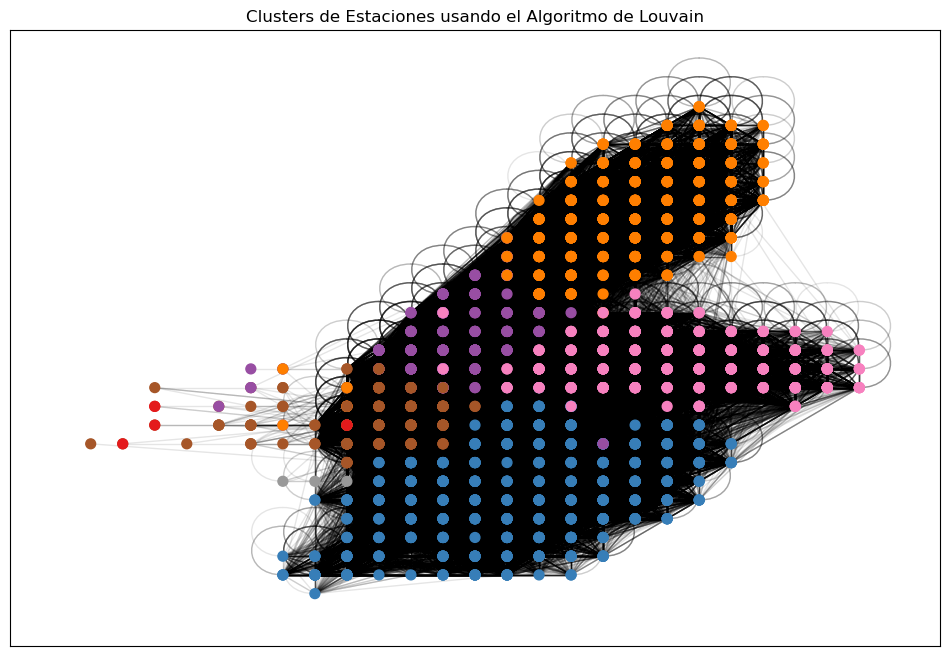

In [23]:
# Opción 1: Algoritmo de Detección de Comunidades Louvain Method
import community as community_louvain

# Convertir el grafo dirigido a no dirigido para este algoritmo
#G_undirected = G.to_undirected()

partition = community_louvain.best_partition(G_undirected, weight='weight')

#Asignar los clusters a los nodos
nx.set_node_attributes(G_undirected, partition, 'cluster')

# Visualizar clusters en el mapa
pos = {node: (data['lng'], data['lat']) for node, data in G_undirected.nodes(data=True)}
clusters = [data['cluster'] for _, data in G_undirected.nodes(data=True)]
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G_undirected, pos, node_size=50, node_color=clusters, cmap=plt.cm.Set1)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.1)
plt.title('Clusters de Estaciones usando el Algoritmo de Louvain')
plt.show()


In [25]:
#Incorporar clusters al Dataset Original
cluster_df = pd.DataFrame({'start_station_id': list(node_cluster.keys()), 'Cluster': list(node_cluster.values())})
df = df.merge(cluster_df, on='start_station_id', how='left')


NameError: name 'node_cluster' is not defined

In [ ]:
# Análisis de demanda por Clusters

# Creamos columna de hora de inicio redondeada al inicio de cada hora
df['Start time rounded'] = df['Started at'].dt.floor('H')

# Calculamos demanda por hora y por cluster
demand = df.groupby(['Start time rounded', 'Cluster']).size().reset_index(name='Trips')

# Crear serie temporal completa rellenando horas sin viajes
date_range = pd.date_range(start=df['Start time rounded'].min(), end=df['Start time rounded'].max(), freq='H')
clusters = cluster_df['Cluster'].unique()

index = pd.MultiIndex.from_product([date_range, clusters], names=['Start time rounded', 'Cluster'])
demand = demand.set_index(['Start time rounded', 'Cluster']).reindex(index, fill_value=0).reset_index()


# Descomposición de la serie temporal para cada cluster, Análisis series Temporales
import statsmodels.api as sm

for cluster in clusters:
    cluster_data = demand[demand['Cluster'] == cluster]
    cluster_data.set_index('Start time rounded', inplace=True)
    decomposition = sm.tsa.seasonal_decompose(cluster_data['Trips'], model='additive', period=24)
    decomposition.plot()
    plt.suptitle(f'Descomposición del Cluster {cluster}')
    plt.show()


# Construcción del modelo predictivo dividiendo los datos en conjuntos de entrenamiento y prueba
fecha_corte = '2021-12-31'  # Ajusta la fecha según tus datos
train_data = demand[demand['Start time rounded'] <= fecha_corte]
test_data = demand[demand['Start time rounded'] > fecha_corte]

# Modelo VAR (Vector AutoRegression)
pivot_demand = train_data.pivot(index='Start time rounded', columns='Cluster', values='Trips').fillna(0)

#Entrenamiento
from statsmodels.tsa.api import VAR

model = VAR(pivot_demand)
results = model.fit(maxlags=24, ic='aic')

#Predecir
lag_order = results.k_ar
forecast = results.forecast(pivot_demand.values[-lag_order:], steps=len(test_data['Start time rounded'].unique()))
forecast_index = test_data['Start time rounded'].unique()
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=pivot_demand.columns)

#Métricas de error
from sklearn.metrics import mean_absolute_error, mean_squared_error

actual = test_data.pivot(index='Start time rounded', columns='Cluster', values='Trips').fillna(0)
mae = mean_absolute_error(actual, forecast_df)
rmse = np.sqrt(mean_squared_error(actual, forecast_df))
print(f'MAE: {mae}, RMSE: {rmse}')



In [ ]:
# Visualización y Análisis de Resultados
for cluster in clusters:
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual[cluster], label='Real')
    plt.plot(forecast_df.index, forecast_df[cluster], label='Predicción')
    plt.title(f'Cluster {cluster}')
    plt.xlabel('Fecha')
    plt.ylabel('Número de Viajes')
    plt.legend()
    plt.show()
